In [1]:
import os
import re
import sys
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# add gaugi by hand
sys.path.append('../../.__python__/')
from Gaugi import load as gload
from kolmov import table_info, dump_all_train_history, dump_train_history

In [2]:
base_path   = '/volume/'
output_path = os.path.join(base_path, 'models_history')
task_name   = 'v1_task/user.mverissi.task.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_*/*'
task_full_name = os.path.join(base_path, task_name)

In [3]:
print(output_path)
print(task_full_name)

/volume/models_history
/volume/v1_task/user.mverissi.task.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_*/*


In [4]:
tuned_info = {
    # validation
    'max_sp_val'     : [],
    'max_sp_pd_val'  : [],
    'max_sp_fa_val'  : [],
    'auc_val'        : [],
    # operation
    'max_sp_op'     : [],
    'max_sp_pd_op'  : [],
    'max_sp_fa_op'  : [],
    'auc_op'        : [],
}

In [5]:
test = table_info(task_full_name, tuned_info, tag='v1')

There are 900 files for this task...


In [6]:
# fill table
test.fill_table()

Filling the table... 
End of fill step, a pandas DataFrame was created...


In [7]:
cv_df = test.get_pandas_table()
cv_df.head()

,train_tag,et_bin,eta_bin,model_idx,sort,init,file_name,total_sgn,total_bkg,max_sp_val,max_sp_pd_val,max_sp_fa_val,auc_val,max_sp_op,max_sp_pd_op,max_sp_fa_op,auc_op
0,v1,2,0,8,0,40,tunedDiscr.jobID_0044.pic.gz,21991,226563,0.964129,0.971364,0.043079,0.989309,0.965064,0.974217,0.044045,0.990439
1,v1,2,0,8,0,41,tunedDiscr.jobID_0044.pic.gz,21991,226563,0.963296,0.972273,0.045639,0.988739,0.964953,0.972671,0.042734,0.990052
2,v1,2,0,8,0,42,tunedDiscr.jobID_0044.pic.gz,21991,226563,0.963471,0.970000,0.043035,0.989260,0.965217,0.973717,0.043246,0.990617
3,v1,2,0,8,0,43,tunedDiscr.jobID_0044.pic.gz,21991,226563,0.962072,0.977273,0.053010,0.989100,0.963790,0.972989,0.045365,0.990130
4,v1,2,0,8,0,44,tunedDiscr.jobID_0044.pic.gz,21991,226563,0.963316,0.970000,0.043344,0.989608,0.965221,0.975535,0.045038,0.990587


In [8]:
cv_df = test.filter_inits('max_sp_val')

In [9]:
len(cv_df)

1650

In [10]:
test.dump_table(cv_df, base_path, 'cv_table_v1')

In [11]:
cv_df.head()

,train_tag,et_bin,eta_bin,model_idx,sort,init,file_name,total_sgn,total_bkg,max_sp_val,max_sp_pd_val,max_sp_fa_val,auc_val,max_sp_op,max_sp_pd_op,max_sp_fa_op,auc_op
69056,v1,0,0,0,0,46,tunedDiscr.jobID_0004.pic.gz,28455,205005,0.949406,0.963106,0.064195,0.982747,0.947130,0.959761,0.065418,0.982995
71325,v1,0,0,0,1,25,tunedDiscr.jobID_0002.pic.gz,28455,205005,0.947411,0.962403,0.067463,0.981599,0.946596,0.957442,0.064189,0.982611
71344,v1,0,0,0,2,24,tunedDiscr.jobID_0002.pic.gz,28455,205005,0.942160,0.945889,0.061561,0.980855,0.944615,0.958426,0.069096,0.982112
69569,v1,0,0,0,3,9,tunedDiscr.jobID_0000.pic.gz,28455,205005,0.946431,0.963106,0.070098,0.982423,0.946478,0.962643,0.069550,0.983515
68287,v1,0,0,0,4,37,tunedDiscr.jobID_0003.pic.gz,28455,205005,0.946725,0.962755,0.069171,0.981539,0.946067,0.961272,0.069018,0.983181


In [12]:
et_range = ['[4, 7[ GeV', '[7, 10[ GeV', '[10, 15[ GeV']
eta_range = ['[0.0, 0.8[', '[0.8, 1.37[', '[1.37, 1.54[', '[1.54, 2.37', '[2.37, 2.47[']

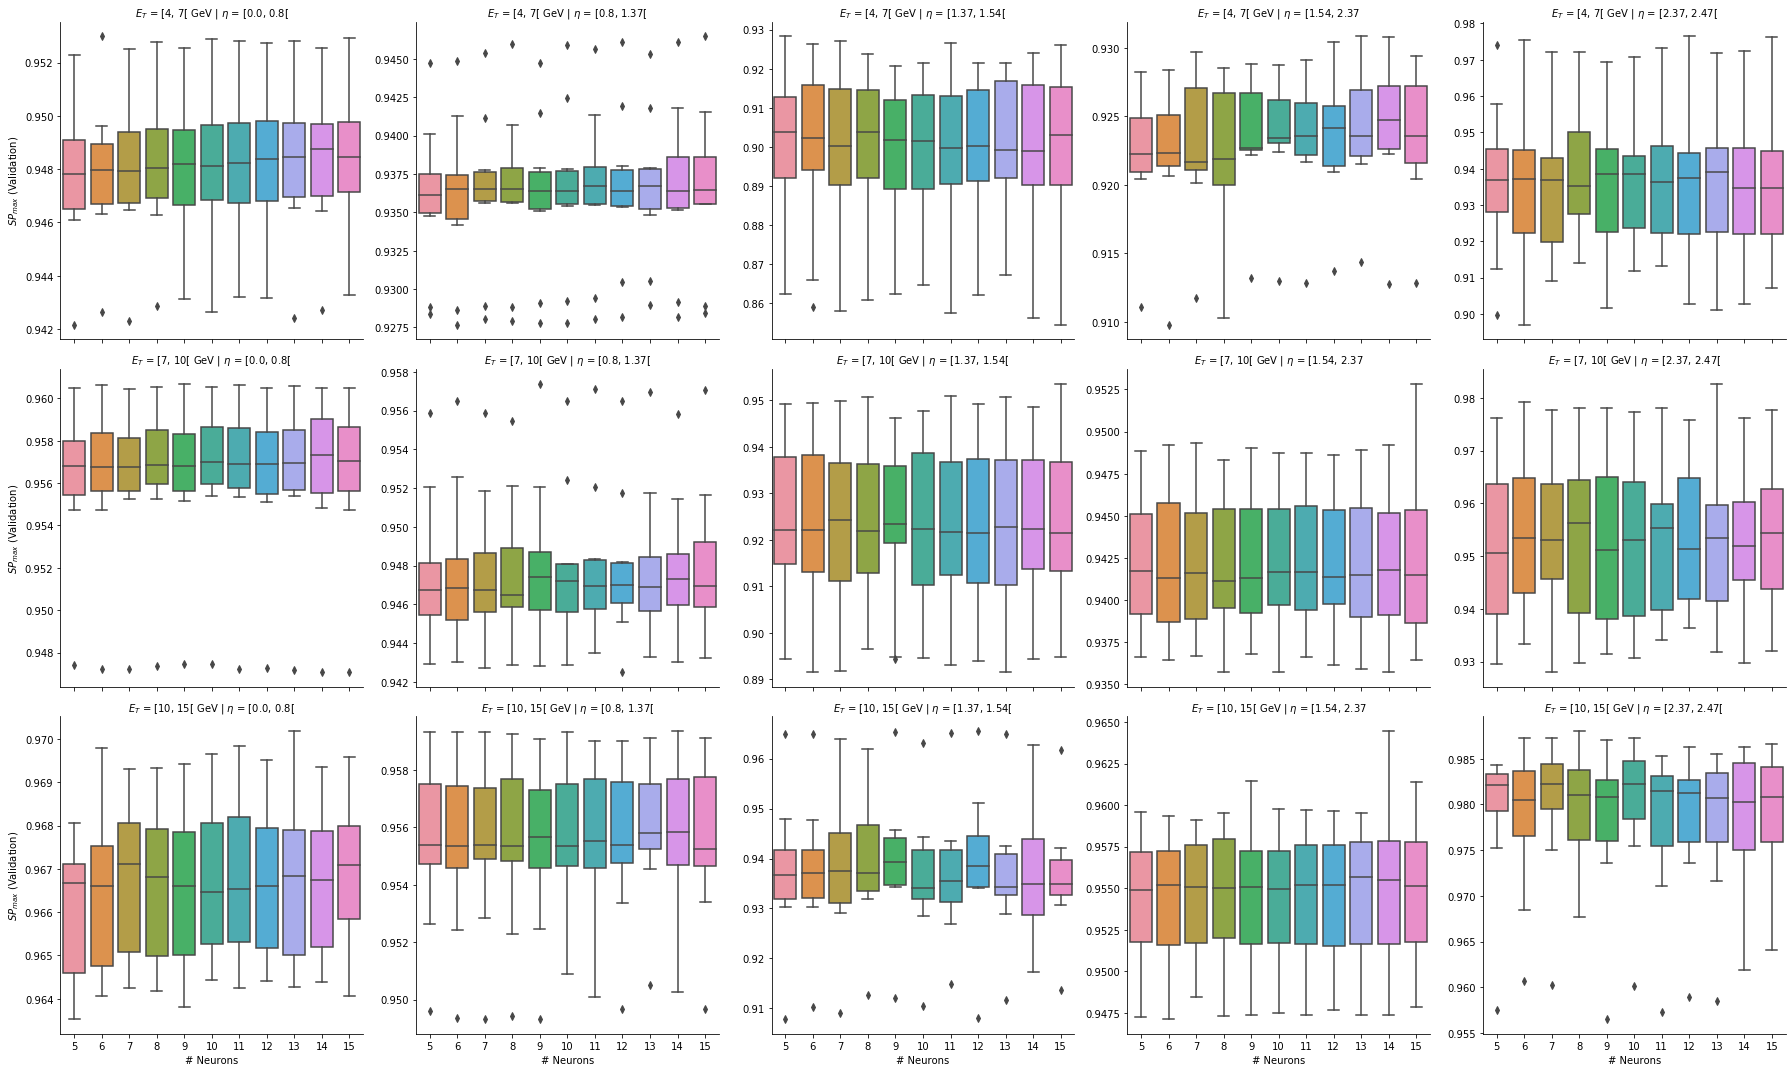

In [13]:
sns.factorplot(data=(cv_df
                     .replace({'model_idx' : {i :  n for i, n in zip(range(0,10+1),
                     range(5,15+1))},
                               'et_bin'    : {i : et_range[i] for i in range(3)},
                               'eta_bin'   : {i : eta_range[i] for i in range(5)}})
                     .rename({'model_idx'  : '# Neurons',
                              'et_bin'     : r'$E_T$',
                              'eta_bin'    : r'$\eta$',
                              'max_sp_val' : r'$SP_{max}$ (Validation)'},
                      axis=1)), x='# Neurons',
                      y=r'$SP_{max}$ (Validation)', col=r'$\eta$', 
                      row=r'$E_T$', kind='box', sharey=False)

plt.savefig(os.path.join(base_path, 'box_plot_v1.png'), dpi=300)

In [14]:
task_p = '/volume/v1_task/user.mverissi.task.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_et%i_eta%i.v1'
dump_all_train_history(cv_df, task_p, output_path)

4 | model: 8
[40 'tunedDiscr.jobID_0044.pic.gz']
et: 0 | eta: 0 | sort: 4 | model: 9
[7 'tunedDiscr.jobID_0040.pic.gz']
et: 0 | eta: 0 | sort: 4 | model: 10
[5 'tunedDiscr.jobID_0050.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 0
[41 'tunedDiscr.jobID_0009.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 1
[4 'tunedDiscr.jobID_0005.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 2
[47 'tunedDiscr.jobID_0019.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 3
[30 'tunedDiscr.jobID_0018.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 4
[22 'tunedDiscr.jobID_0027.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 5
[1 'tunedDiscr.jobID_0025.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 6
[44 'tunedDiscr.jobID_0039.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 7
[36 'tunedDiscr.jobID_0038.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 8
[26 'tunedDiscr.jobID_0047.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 9
[40 'tunedDiscr.jobID_0049.pic.gz']
et: 0 | eta: 0 | sort: 5 | model: 10
[38 'tunedDiscr.jobID_0058.pic.gz']
et: 0 | eta: 0 | 

IndexError: index 0 is out of bounds for axis 0 with size 0

In [15]:
t = os.path.join(base_path, 'v1_task/user.mverissi.task.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_et0_eta0.v1/tunedDiscr.jobID_0004.pic.gz')

f=gload(t)
f['tunedData'][0].keys()

dict_keys(['imodel', 'sort', 'init', 'history', 'sequence', 'weights', 'metadata', 'time'])

In [ ]:
import pprint
for ientry in f['tunedData']:
    if (ientry['imodel'] == 0) and (ientry['init'] == 40) and (ientry['sort'] == 3):
        pprint.pprint(ientry['history'])

In [17]:
cv_df.loc[((cv_df.et_bin==0)    & \
           (cv_df.eta_bin==3)   & \
           (cv_df.model_idx==0) & \
           (cv_df.sort==0)      ), ['init', 'file_name']].values[0]

array([35, 'tunedDiscr.jobID_0003.pic.gz'], dtype=object)

In [20]:
a, b

(46, 'tunedDiscr.jobID_0004.pic.gz')

In [ ]:
task_p = '/volume/v1_task/user.mverissi.task.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_et%i_eta%i.v1'

In [ ]:
test.dump_train_history(cv_df, et_bin=0, eta_bin=0, 
                        sort=0, modelidx=1,
                        path_to_task=task_p)

In [ ]:
cv_df.et_bin.unique()